**Introduction to Recommendation systems**


A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

They can be used for:
* It can help the user to find the right product.
*It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
* It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
* It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.



**Types of recommendations**

There are mainly 6 types of the recommendations systems, though we will be demonstrating 3 of those in this project :-

1.  Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.

**Attribute Information:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [ ]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

The Amazon product review dataset is huge, size of the dataset is 320 MB so it's recommended to download using the Kaggle repository which will be handy for further execution and will save your time and resources.

###Aquiring & Exploring the Dataset

In [ ]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

opendatasets is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.66.2)

Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.6.12)

Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.7)

Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi>=2023.7.22 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2024.2.2)

Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.31.0)

Requirement already satisfied: python-slugify in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (8.0.4)

Requirement already satisfied: urllib3 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.0.7)

Requirement already satisfied: bleach in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (6.1.0)

Requirement already satisfied: webencodings in /usr/local/lib/python3.10/dist-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in /usr/local/lib/python3.10/dist-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.3.2)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.7)

Installing collected packages: opendatasets

Successfully installed opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: a7h4rv4
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews


100%|██████████| 109M/109M [00:01<00:00, 62.2MB/s]


In [ ]:
#load the dataframe and set column name
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [ ]:
df.shape

(7824482, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 20% of the data as sample out of the whole dataset which is 1564896.

In [ ]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [ ]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [ ]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A2MHW0R94E4MBX,B000I7VWKC,5.0,1376611200
1,A3JIU48PL3SX0A,B0011TV8QO,1.0,1217808000
2,A2OC0FRUJRCR43,B004HYHZJY,5.0,1327190400
3,A1JDOASIG43O8W,B008ATLJGC,5.0,1343952000
4,A150EKVW613YX7,B007PRHNHO,5.0,1363392000


In [ ]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [ ]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [ ]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.009602e+00
std,1.382296e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

In [ ]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [ ]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [ ]:
electronics_data.head()

,userId,productId,rating
0,A2MHW0R94E4MBX,B000I7VWKC,5.0
1,A3JIU48PL3SX0A,B0011TV8QO,1.0
2,A2OC0FRUJRCR43,B004HYHZJY,5.0
3,A1JDOASIG43O8W,B008ATLJGC,5.0
4,A150EKVW613YX7,B007PRHNHO,5.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

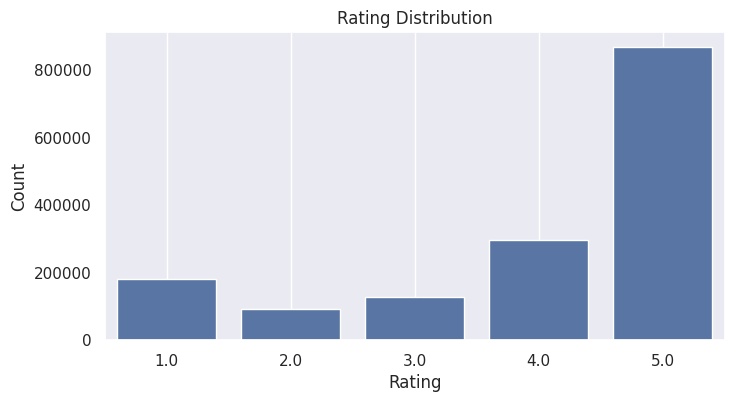

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [ ]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1226037
Total unique products :  238024


analyzing the rating by user

In [ ]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     108
ADLVFFE4VBT8      105
A3OXHLG6DIBRW8     92
A680RUE1FDO8B      88
A6FIAB28IS79       81
Name: rating, dtype: int64

In [ ]:
print('No of rated product more than 20 per user : {} '.format(sum(no_of_rated_products_per_user >= 20)))

No of rated product more than 20 per user : 330 


###Popularity Based Recommendation

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [ ]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=20)

In [ ]:
data.head()

,userId,productId,rating
2,A2OC0FRUJRCR43,B004HYHZJY,5.0
3,A1JDOASIG43O8W,B008ATLJGC,5.0
4,A150EKVW613YX7,B007PRHNHO,5.0
5,A22LFUUUUSTTYO,B003VPABK0,4.0
7,A34T15AXODYOUR,B003DZ166Q,5.0


In [ ]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [ ]:
no_of_rating_per_product.head()

productId
B0074BW614    3687
B00DR0PDNE    3301
B007WTAJTO    2888
B0019EHU8G    2442
B006GWO5WK    2421
Name: rating, dtype: int64

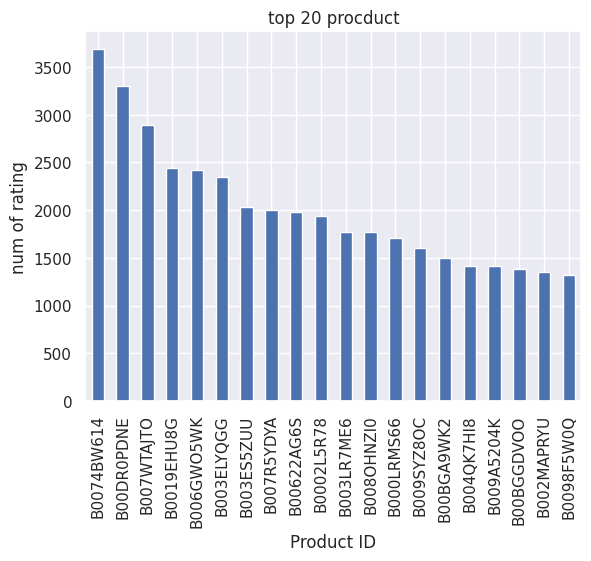

In [ ]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [ ]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [ ]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.541485
1400501466,3.370968
1400501776,3.875000
1400532620,3.285714
1400532655,3.581633


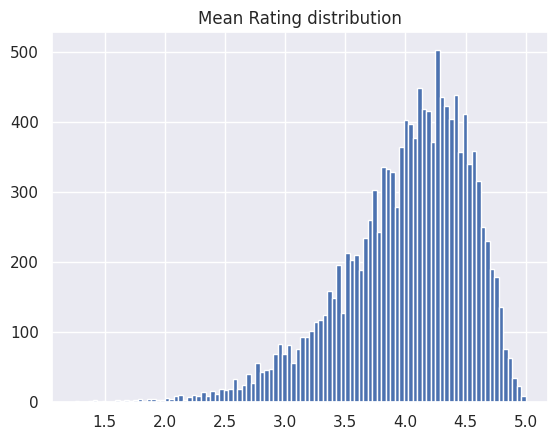

In [ ]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [ ]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9281554624487162

In [ ]:
#it is highly negative skewed

In [ ]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [ ]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.541485,229
1400501466,3.370968,62
1400501776,3.875000,24
1400532620,3.285714,35
1400532655,3.581633,98


In [ ]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.489829,3687


In [ ]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  20
total min average rating products :  707


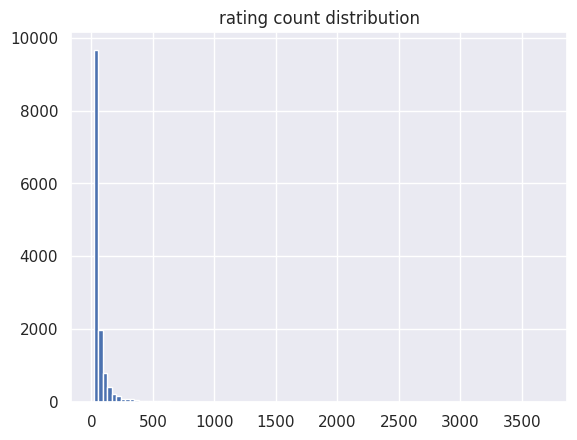

In [ ]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

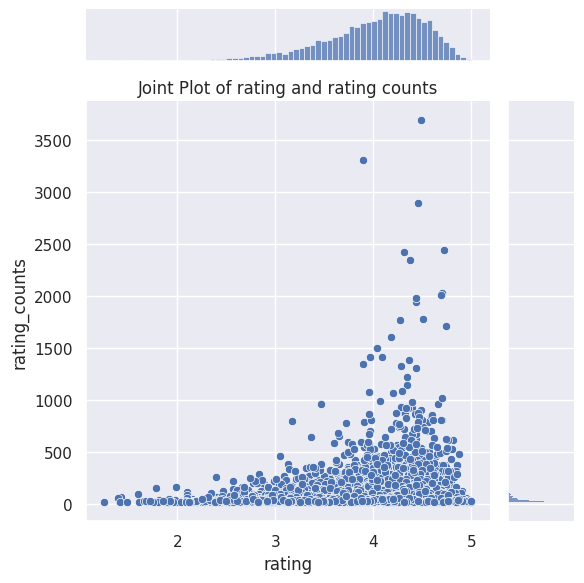

In [ ]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

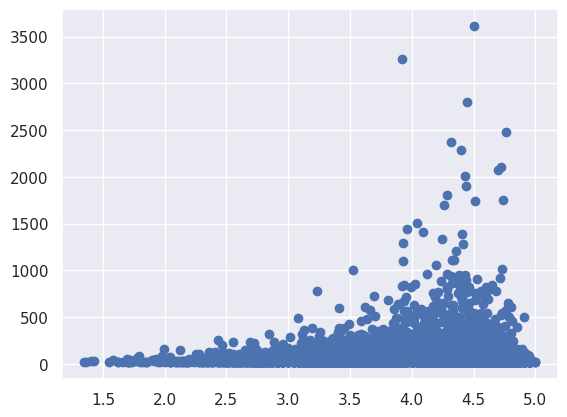

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.08331768005118295 


###Collaborative Filtering

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [ ]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


surprise is not installed. Installing...


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit-surprise-1.1.3.tar.gz (771 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: joblib>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.4.0)

Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.25.2)

Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.11.4)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (setup.py): started

Building wheel for scikit-surprise (setup.py): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163005 sha256=77372124436b0bf23502d208eaa327ad2bc3c4f1b5310d65ff3c17a2ec806edf

Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.3 surprise-0.1

In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [ ]:
#Splitting surprise the dataset into 70,30 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#make prediction using testset
test_pred=algo.test(testset)

In [ ]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3325


1.3324876657926619

###Content-Based Recommendation system

**Content-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [ ]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501776,1400532655,140053271X,7214047977,9575871979,9625993428,B000001OM4,B00000J061,B00000J1EJ,...,B00J5HDEPC,B00J5O7BMC,B00J5OTUOY,B00JC5Y6YA,B00JDAIMQ2,B00JEGLLEA,B00JLADOGW,B00JM59JPG,B00K91DB7Y,B00KFAGCUM
userId,,,,,,,,,,,,,,,,,,,,,
A00177003DHPZK2U5PDY5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A004176027NXFTHNBG3MW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A014623426J5CM7M12MBW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02508982X9VH3LX4Q2OM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02785982HMFVSLJGIBBD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [ ]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19885, 8299)

In [ ]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00177003DHPZK2U5PDY5,A004176027NXFTHNBG3MW,A014623426J5CM7M12MBW,A02508982X9VH3LX4Q2OM,A02785982HMFVSLJGIBBD,A06400553IMOK4C24N1ED,A06486753T2BJ7AW8A6BY,A0707236X5M5S9W8A3T6,A07357631WKS40T0ETB1V,A0757159TSQ75IXPGNPP,...,AZXMVG4L0HT2I,AZXNS00WMWRHJ,AZXZC8J8DFTHX,AZY2E985BS6G7,AZY34KW8TB2TU,AZYGRBHAMGTH3,AZYM3DJX3HZ7B,AZYPOLLSDVG4K,AZZGV7Z7FTS5P,AZZVN0HD9OTBQ
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7214047977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_ratings_matrix.shape

(8299, 19885)

In [ ]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(8299, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(8299, 8299)

****
**Recommendation based on Single Input**

In [ ]:
x_ratings_matrix.index[10]

'B00000J1QK'

In [ ]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

22


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(8299,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(264, 8299)

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4ZH',
 'B00002SWHH',
 'B00004T8R2',
 'B0000645RH',
 'B000066R6M',
 'B00006I53S',
 'B00007AP2O',
 'B00008W7LS',
 'B00009UT9B',
 'B0001VWHH2',
 'B0002855KK',
 'B0002IHP58',
 'B0002KVQBA',
 'B0002L5R78',
 'B000652SOK',
 'B0007POE6O',
 'B0007V5X4U',
 'B0007VPFI4',
 'B0007XXU3E',
 'B00083XXQM']

****
**Recommendation Based on Multiple Inputs**

In [ ]:
def recommend_products(input_product_ids, ratings_data, num_recommendations=20, correlation_threshold=0.75, num_components=10):
    #Sample data
    data2 = ratings_data.sample(20000)
    #Create ratings matrix
    ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
    #Transpose the rating matrix
    x_ratings_matrix = ratings_matrix.T
    #Decomposition using SVD
    SVD = TruncatedSVD(n_components=num_components)
    decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
    #Corelation Matrix
    correlation_matrix = np.corrcoef(decomposed_matrix)

    #inf product IDs in the Matrix
    product_names = list(x_ratings_matrix.index)

    # Initialize a dictionary to store recommended product arrays for each input product
    recommended_products_dict = {}

    # Loop through each input product ID
    for product_id in input_product_ids:
        # Find index of the product in the matrix
        product_index = product_names.index(product_id)
        # Find correlation with other products
        correlation_product_ID = correlation_matrix[product_index]
        # Find products with correlation above the threshold
        similar_products = [product_names[i] for i in range(len(correlation_product_ID)) if correlation_product_ID[i] > correlation_threshold and i != product_index]
        recommended_products_dict[product_id] = similar_products

    # Find the intersection of recommended products arrays
    intersection = set(recommended_products_dict[input_product_ids[0]]).intersection(*recommended_products_dict.values())

    # Limit to the top recommendations
    recommended_products = list(intersection)[:num_recommendations]

    return recommended_products

In [ ]:
input_product_ids = ["B00001P4ZH", "B00004T8R2"]  # Input multiple product IDs
recommended_products = recommend_products(input_product_ids, data)
print("Recommended Products:")
recommended_products

Recommended Products:


['B002Y6CJJ8',
 'B0052PNK6O',
 'B00005T406',
 'B0064Z71T8',
 'B00DQZNPAS',
 'B003QN64YY',
 'B000B8IHDS',
 'B0046TDJJK',
 'B00AO7DC9K',
 'B0041VZN6U',
 'B00B4OCWE8',
 'B00BVUQZZ2',
 'B000H2W4E6',
 'B0013PQ6P4',
 'B005J963W6',
 'B003BWHLMO',
 'B00EI4V3X2',
 'B004RKQM8I',
 'B0056BPUQC',
 'B0009GUDVQ']